In [104]:
import pandas
cake = pandas.read_csv('csvFiles/cake.csv')
cake.columns = ['try', 'replicate', 'recipe', 'temperature','angle','temp']

In [105]:
cake.dtypes

try             int64
replicate       int64
recipe         object
temperature     int64
angle           int64
temp            int64
dtype: object

In [106]:
cake = pandas.DataFrame(cake)
del cake['temperature']

In [107]:
cakeA = cake.loc[cake['recipe'] == 'A']
cakeA['angle'].mean()

33.12222222222222

In [108]:
cakeA

,try,replicate,recipe,angle,temp
0,1,1,A,42,175
1,2,1,A,46,185
2,3,1,A,47,195
3,4,1,A,39,205
4,5,1,A,53,215
5,6,1,A,42,225
18,19,2,A,47,175
19,20,2,A,29,185
20,21,2,A,35,195
21,22,2,A,47,205


In [8]:
#gives average angle for each temp 
temps = [175, 185, 195, 205, 215, 225]
for temp in temps:
    print cakeA.loc[cakeA['temp'] == temp]['angle'].mean()

29.1333333333
31.5333333333
30.8
33.5333333333
38.6666666667
35.0666666667


In [115]:
tmp = cakeA['temp']
temp = tmp.unique()
for temp in temps:
    print cakeA.loc[cakeA['temp'] == temp]['angle'].mean()

29.1333333333
31.5333333333
30.8
33.5333333333
38.6666666667
35.0666666667


In [116]:
#calculate and save the mean of every recipe at certain temperatures
recipes = ['A', 'B', 'C']

recipe_dict = dict()

recipe_temps = []
for recipe in recipes:
    print recipe
    if recipe not in recipe_dict:
        recipe_dict[recipe] = dict()
    for temp in temps:   
        curRecipe = cake.loc[cake['recipe'] == recipe]
        recipe_dict[recipe][temp] = curRecipe.loc[curRecipe['temp'] == temp]['angle'].mean()

A
B
C


In [10]:
recipe_dict

{'A': {175: 29.133333333333333,
  185: 31.533333333333335,
  195: 30.8,
  205: 33.53333333333333,
  215: 38.666666666666664,
  225: 35.06666666666667},
 'B': {175: 26.866666666666667,
  185: 29.4,
  195: 31.733333333333334,
  205: 32.13333333333333,
  215: 34.46666666666667,
  225: 35.266666666666666},
 'C': {175: 27.933333333333334,
  185: 28.933333333333334,
  195: 31.733333333333334,
  205: 30.866666666666667,
  215: 34.4,
  225: 35.733333333333334}}

In [11]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


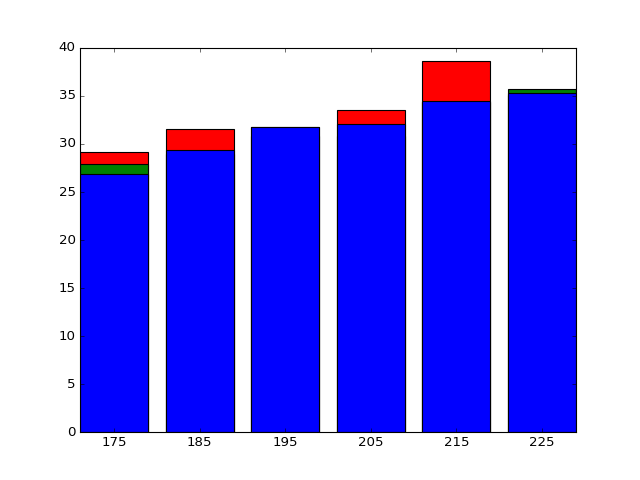

In [117]:
%matplotlib notebook

for recipe in recipe_dict:
    temps = sorted(recipe_dict[recipe].keys()) #so x-axis is in order
    vals = [] #for y axis
    for temp in temps:
        vals.append(recipe_dict[recipe][temp])
    
    colors = ['r', 'g', 'b']
    col = colors[recipe_dict.keys().index(recipe)]
    
    plt.bar(range(len(recipe_dict[recipe])), vals, color=col, label=recipe, align='center')
    plt.xticks(range(len(recipe_dict[recipe])), temps)
    
    plt.show()

In [2]:
#pip install ggplot
from ggplot import *

In [63]:
recipe_df = pandas.DataFrame.from_dict(recipe_dict)
recipe_df

,A,B,C
175,29.133333,26.866667,27.933333
185,31.533333,29.400000,28.933333
195,30.800000,31.733333,31.733333
205,33.533333,32.133333,30.866667
215,38.666667,34.466667,34.400000
225,35.066667,35.266667,35.733333


In [61]:
#recipe_df.columns = ['temp', 'A', 'B', 'C']
recipe_df['temp'] = recipe_df.index
recipe_df

,temp,A,B,C
175,175,26.866667,27.933333,175
185,185,29.400000,28.933333,185
195,195,31.733333,31.733333,195
205,205,32.133333,30.866667,205
215,215,34.466667,34.400000,215
225,225,35.266667,35.733333,225


In [64]:
#rerun 42
recipe_df.reset_index(inplace=True)
recipe_df

,index,A,B,C
0,175,29.133333,26.866667,27.933333
1,185,31.533333,29.400000,28.933333
2,195,30.800000,31.733333,31.733333
3,205,33.533333,32.133333,30.866667
4,215,38.666667,34.466667,34.400000
5,225,35.066667,35.266667,35.733333


In [70]:
recipe_df.columns = ['temp', 'A', 'B', 'C']
recipe_df

,temp,A,B,C
0,175,29.133333,26.866667,27.933333
1,185,31.533333,29.400000,28.933333
2,195,30.800000,31.733333,31.733333
3,205,33.533333,32.133333,30.866667
4,215,38.666667,34.466667,34.400000
5,225,35.066667,35.266667,35.733333


<IPython.core.display.Javascript object>


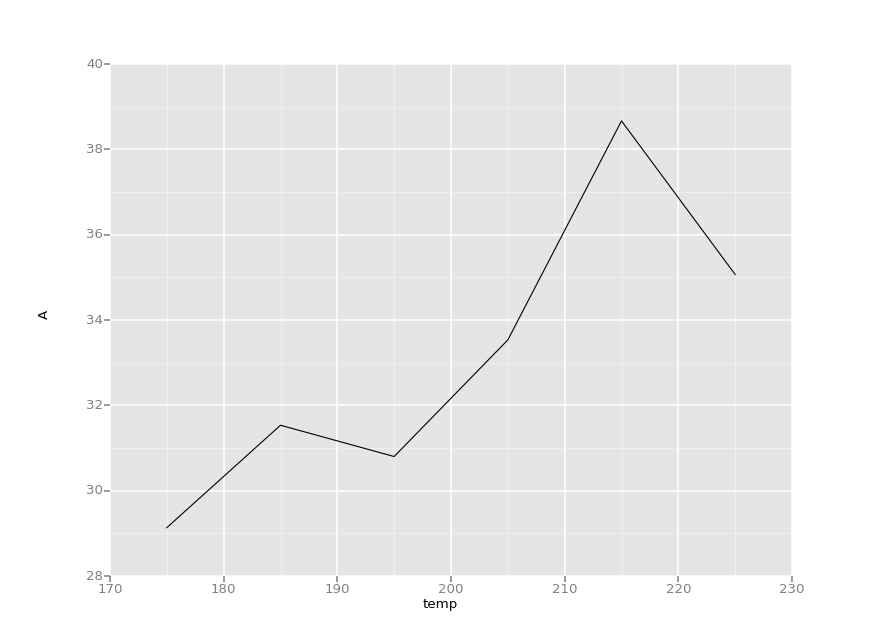

<ggplot: (298248069)>

In [66]:
ggplot(aes(x='temp', y='A'), data=recipe_df) + geom_line()

<IPython.core.display.Javascript object>


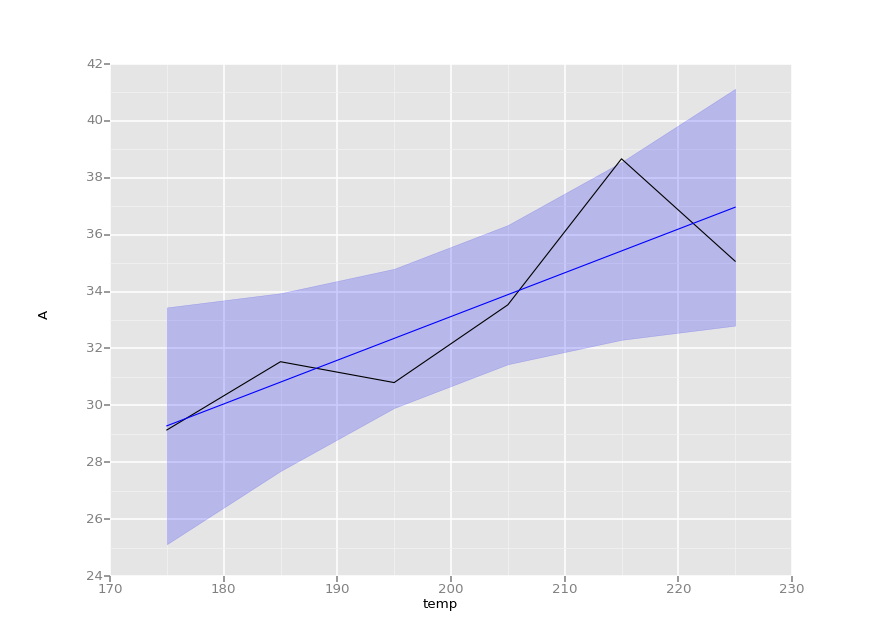

<ggplot: (296100277)>

In [54]:
plot = ggplot(aes(x='temp', y='A'), data=recipe_df) 
plot + geom_line() + stat_smooth(color='blue', span=0.2)

<IPython.core.display.Javascript object>


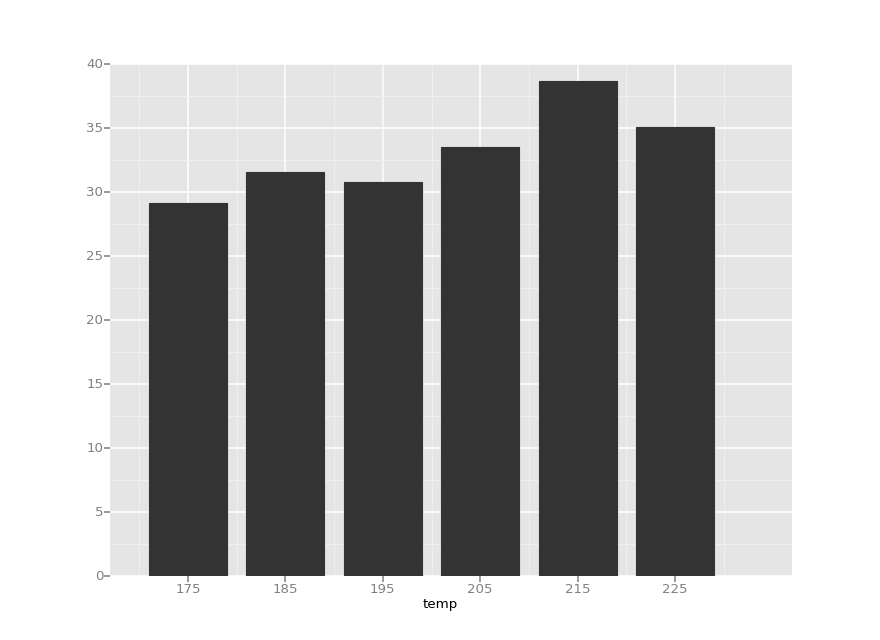

<ggplot: (308897357)>

In [94]:
ggplot(aes(x='temp', weight='A'), data=recipe_df) + geom_bar()

<IPython.core.display.Javascript object>


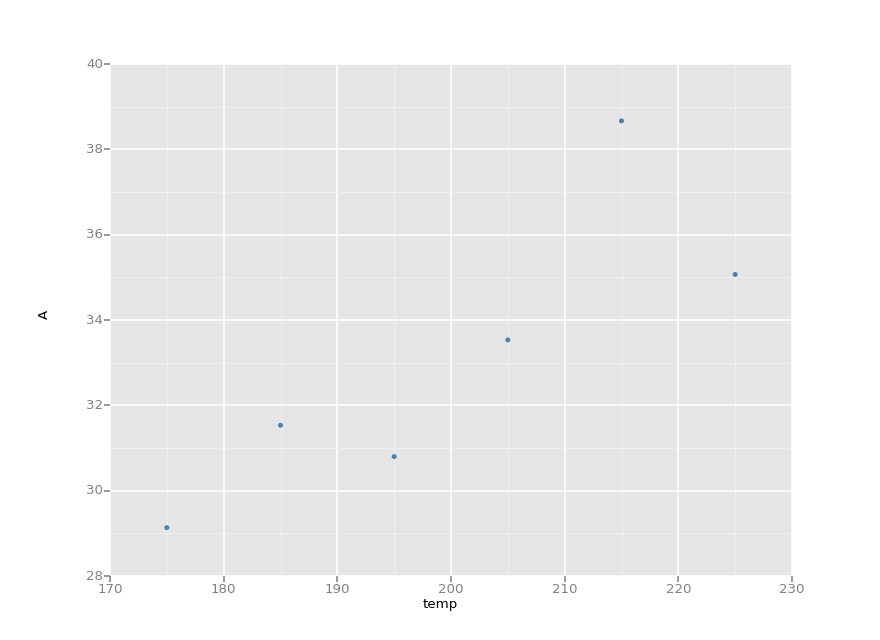

<ggplot: (308152817)>

In [91]:
ggplot(aes(x='temp', y='A'), data=recipe_df) + geom_point(color='steelblue')

In [95]:
recipe_df

,temp,A,B,C
0,175,29.133333,26.866667,27.933333
1,185,31.533333,29.400000,28.933333
2,195,30.800000,31.733333,31.733333
3,205,33.533333,32.133333,30.866667
4,215,38.666667,34.466667,34.400000
5,225,35.066667,35.266667,35.733333


In [101]:
recipe_melt = pandas.melt(recipe_df, id_vars=['temp'], var_name='recipe')
recipe_melt

,temp,recipe,value
0,175,A,29.133333
1,185,A,31.533333
2,195,A,30.800000
3,205,A,33.533333
4,215,A,38.666667
5,225,A,35.066667
6,175,B,26.866667
7,185,B,29.400000
8,195,B,31.733333
9,205,B,32.133333


<IPython.core.display.Javascript object>


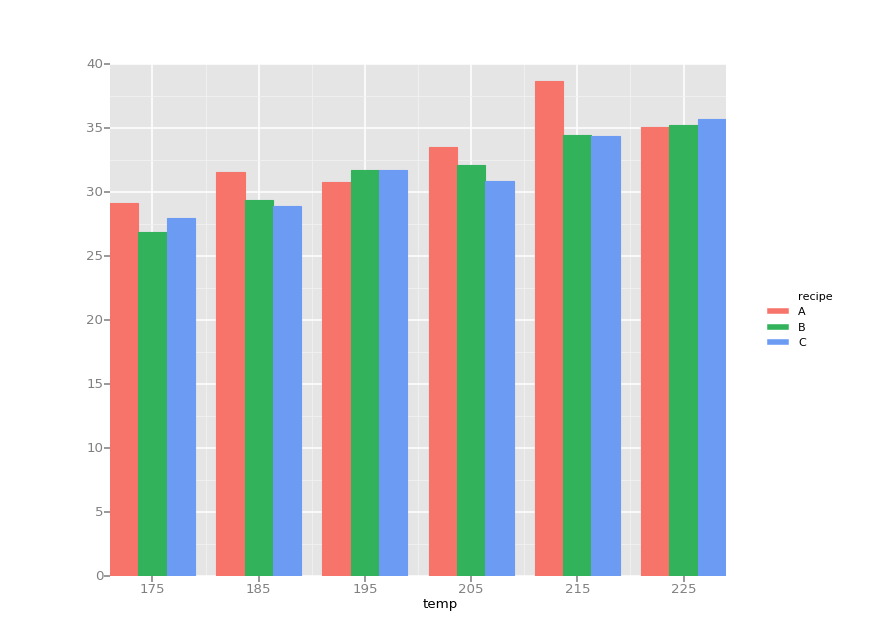

<ggplot: (308864389)>

In [102]:
ggplot(aes(x='temp', weight='value', fill='recipe'), data=recipe_melt) + geom_bar()

<IPython.core.display.Javascript object>


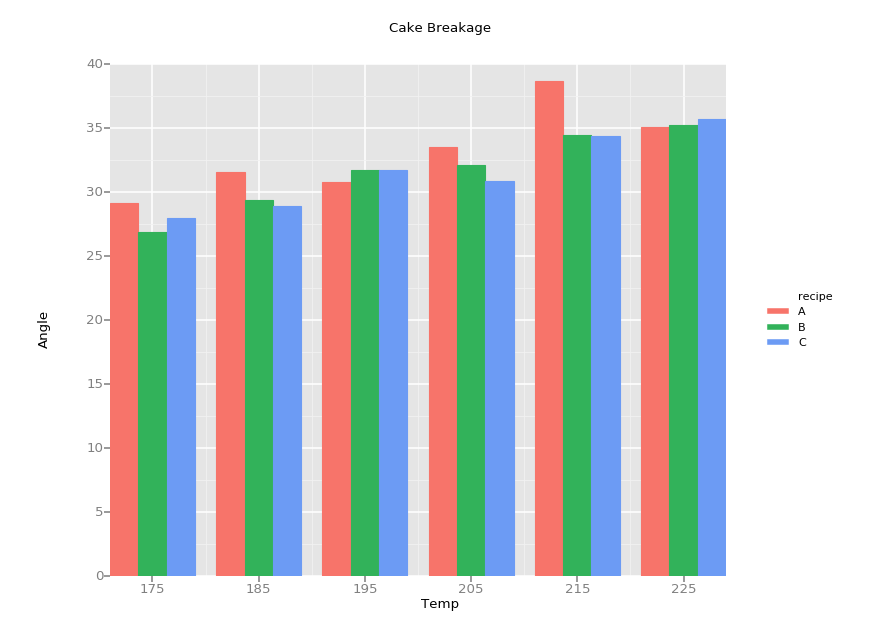

<ggplot: (310520789)>

In [103]:
ggplot(aes(x='temp', weight='value', fill='recipe'), data=recipe_melt) + geom_bar() + xlab("Temp") + ylab("Angle") + ggtitle('Cake Breakage')